In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse

from numba import jit
from tqdm.auto import tqdm

In [5]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [6]:
def z_score_normalize(a):
    mean = np.mean(a, axis=0)
    std = np.std(a, axis=0)
    return (a - mean) / std

In [7]:
df_np = z_score_normalize(df.to_numpy())

X = df_np[:, :-1]
y = df_np[:, -1]

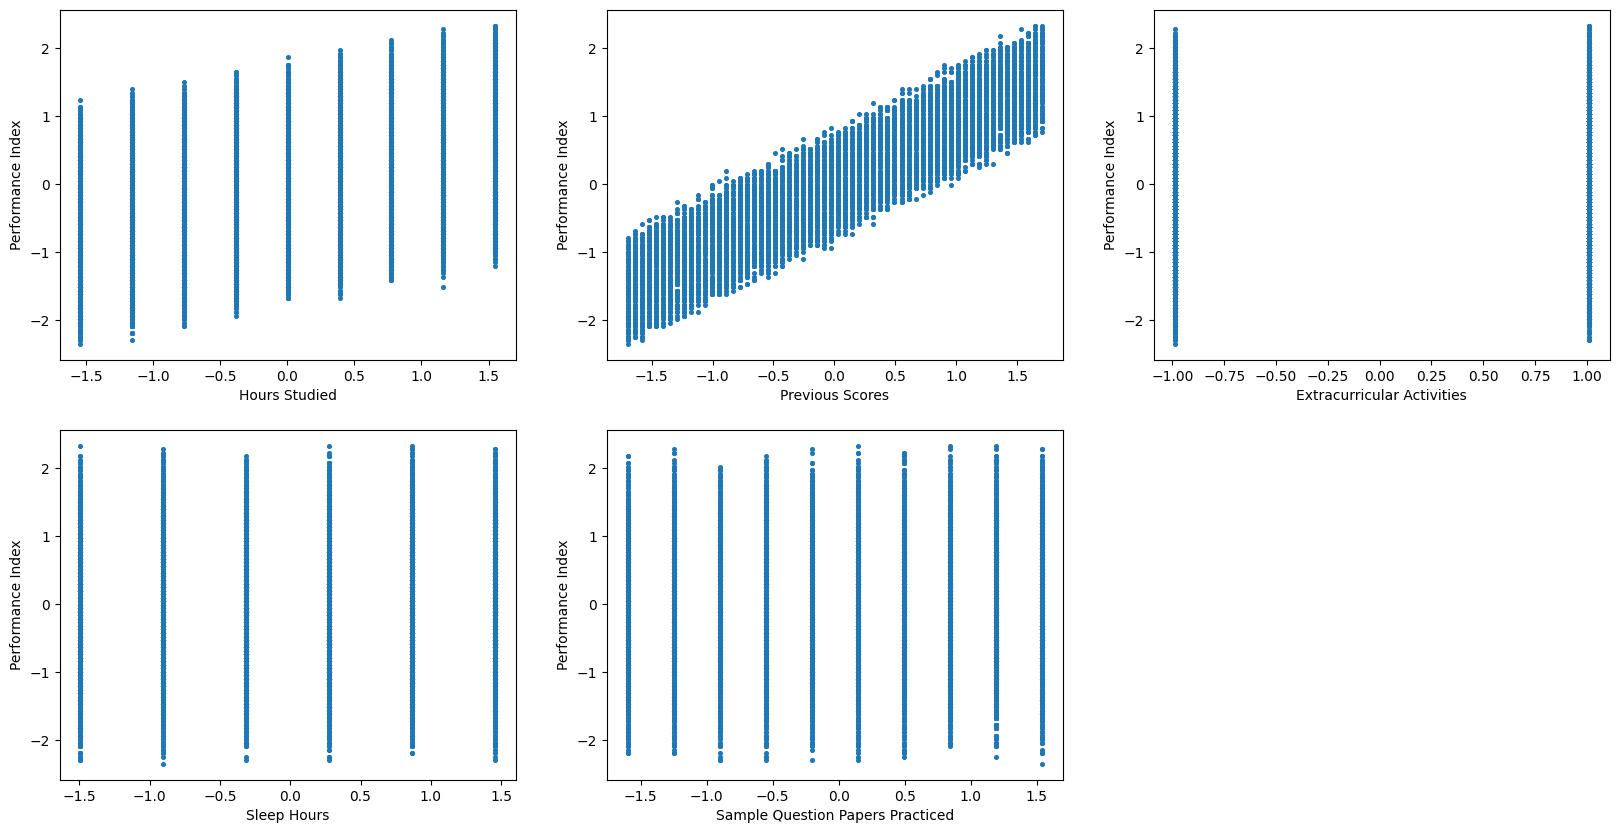

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, col in enumerate(df.columns[:-1]):
    ax[i].set_xlabel(col)
    ax[i].set_ylabel(df.columns[-1])
    ax[i].scatter(X[:, i], y, s=7)

fig.delaxes(ax[-1])

In [9]:
msk = np.random.permutation(X.shape[0])
m = round(0.8 * X.shape[0])
n = X.shape[1]

X_train = X[msk[:m]]
y_train = y[msk[:m]]

X_test = X[msk[m:]]
y_test = y[msk[m:]]

In [10]:
@jit
def compute_gradient(X, y, w, b):
    y_hat = np.dot(w, X.transpose()) + b

    dj_dw = (1 / m) * np.dot((y_hat - y), X)
    dj_db = (1 / m) * np.sum(y_hat - y)

    return dj_dw, dj_db

In [11]:
@jit
def compute_cost(X, y, w, b):
    y_hat = np.dot(w, X.transpose()) + b
    J = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
    return J

In [12]:
def gradient_descent(X, y, w, b, num_iters, alpha):
    J_hist = []

    for i in tqdm(range(num_iters)):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        J_hist.append(compute_cost(X, y, w, b))
        if i % (num_iters // 10) == 0:
            tqdm.write(f'Iteration = {i:6}, Cost = {J_hist[-1]:.8f}')

    return w, b, J_hist

In [13]:
w = np.zeros(n)
b = 0
num_iters = 100000
alpha = 0.0001

w, b, J = gradient_descent(X_train, y_train, w, b, num_iters, alpha)

  0%|          | 0/100000 [00:00<?, ?it/s]

Iteration =      0, Cost = 0.49678360
Iteration =  10000, Cost = 0.07393618
Iteration =  20000, Cost = 0.01513146
Iteration =  30000, Cost = 0.00693961
Iteration =  40000, Cost = 0.00579658
Iteration =  50000, Cost = 0.00563685
Iteration =  60000, Cost = 0.00561450
Iteration =  70000, Cost = 0.00561136
Iteration =  80000, Cost = 0.00561092
Iteration =  90000, Cost = 0.00561086


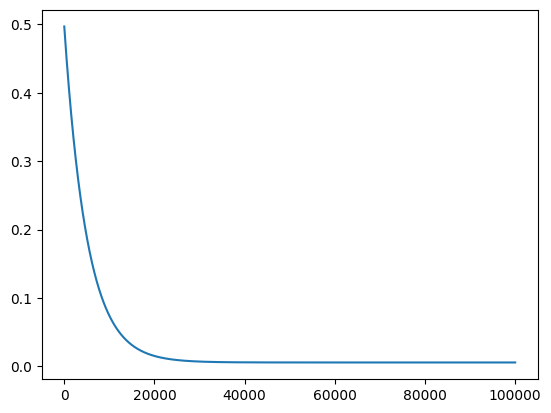

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(J)), J)

In [15]:
y_pred = np.dot(w, X_test.transpose())

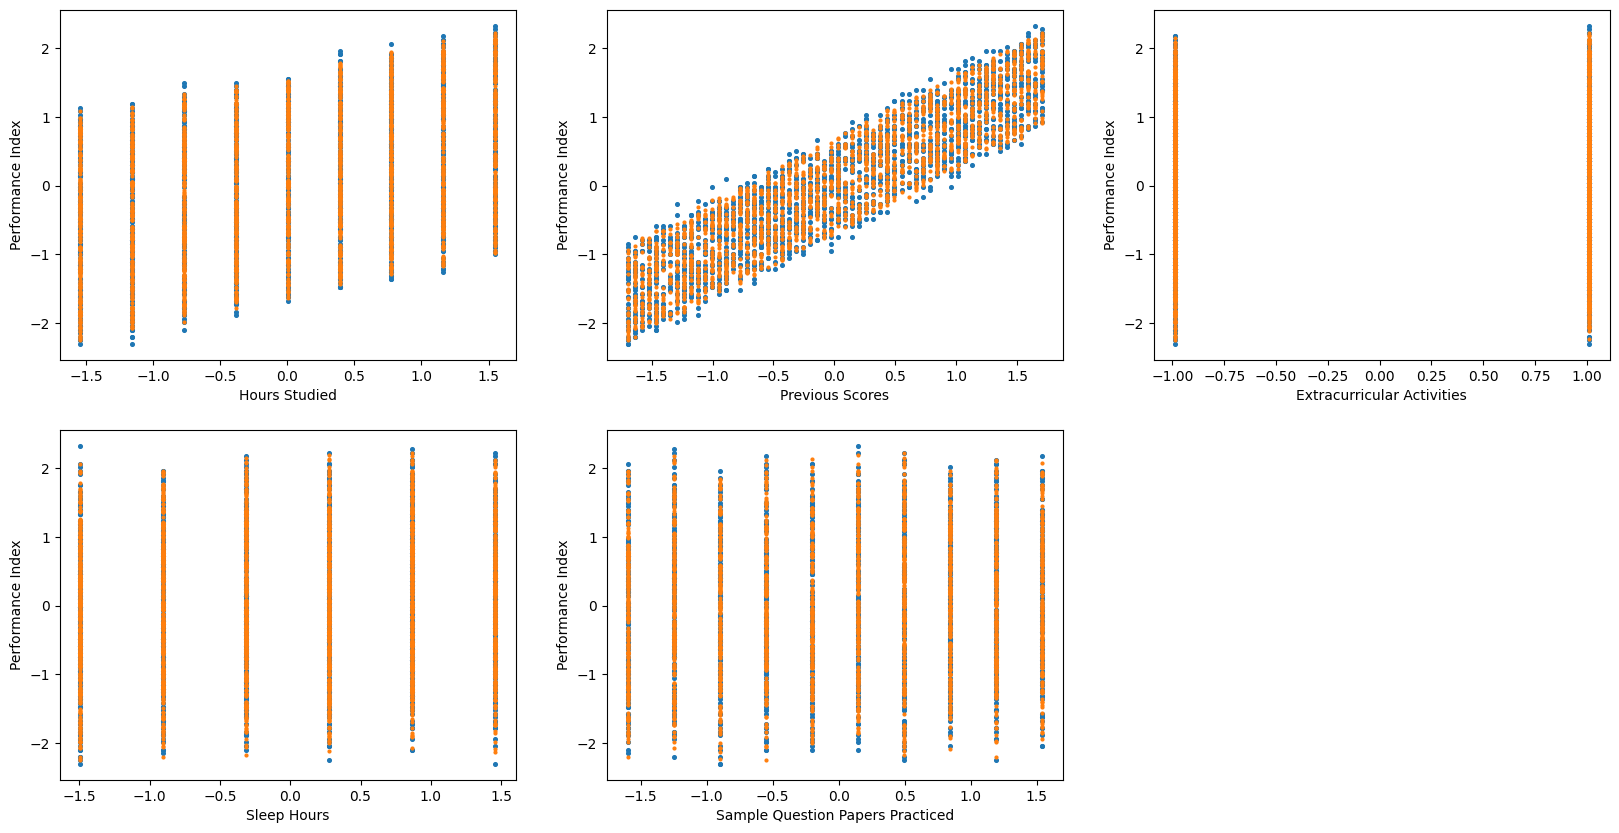

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, col in enumerate(df.columns[:-1]):
    ax[i].set_xlabel(col)
    ax[i].set_ylabel(df.columns[-1])
    ax[i].scatter(X_test[:, i], y_test, s=7)
    ax[i].scatter(X_test[:, i], y_pred, s=4)

fig.delaxes(ax[-1])

In [17]:
def r2_score(y_test, y_pred):
    RSS = np.sum((y_test - y_pred) ** 2)
    TSS = np.sum((y_test - y_pred.mean()) ** 2)
    return 1 - RSS / TSS
    
print(f'r2_score = {r2_score(y_test, y_pred):.4f}')

r2_score = 0.9889


In [ ]:
# def main():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('file_path', help='path to the .csv file')
#     parser.add_argument('-a', '--alpha', help='learning rate, alpha', type=int, default=0.01)
#     parser.add_argument('-i', '--iters', help='number of iterations', type=int, default=10000)
#     args = parser.parse_args()

# if __name__ == '__main__':
#     main()